# Affine gap sequence alignment


Code Challenge: Solve the Alignment with Affine Gap Penalties Problem.

Input: A match reward, a mismatch penalty, a gap opening penalty, a gap extension penalty, and two nucleotide strings.
Output: The maximum alignment score between v and w, followed by an alignment of v and w achieving this maximum score.



```
# Sample Input:
1 3 2 1
GA
GTTA
Sample Output:
-1
G--A
GTTA
```



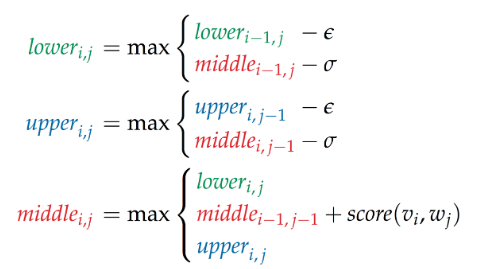

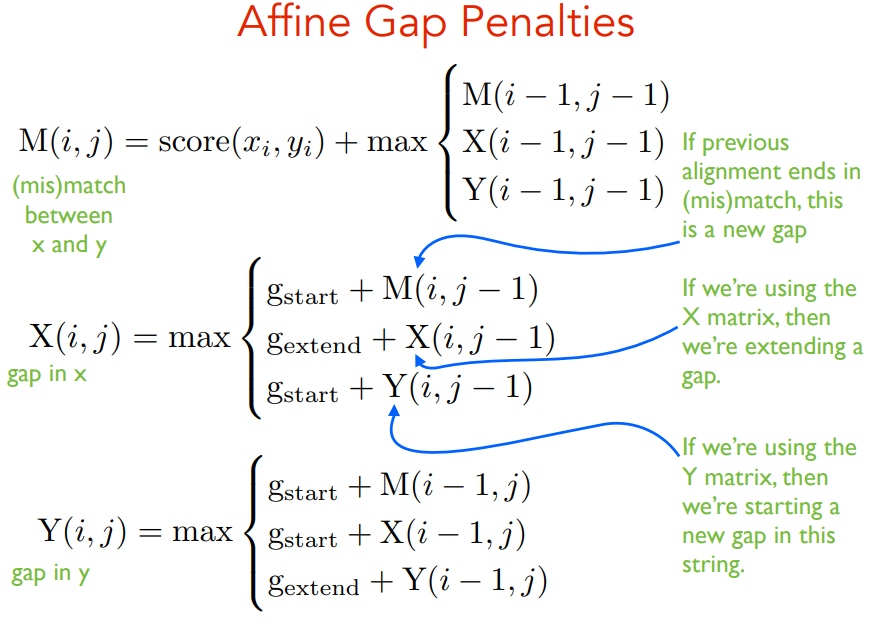

In [ ]:
blosum62 = {'A': {'A': 4, 'C': 0, 'E': -1, 'D': -2, 'G': 0, 'F': -2, 'I': -1, 'H': -2, 'K': -1, 'M': -1, 'L': -1, 'N': -2, 'Q': -1, 'P': -1, 'S': 1, 'R': -1, 'T': 0, 'W': -3, 'V': 0, 'Y': -2}, 'C': {'A': 0, 'C': 9, 'E': -4, 'D': -3, 'G': -3, 'F': -2, 'I': -1, 'H': -3, 'K': -3, 'M': -1, 'L': -1, 'N': -3, 'Q': -3, 'P': -3, 'S': -1, 'R': -3, 'T': -1, 'W': -2, 'V': -1, 'Y': -2}, 'E': {'A': -1, 'C': -4, 'E': 5, 'D': 2, 'G': -2, 'F': -3, 'I': -3, 'H': 0, 'K': 1, 'M': -2, 'L': -3, 'N': 0, 'Q': 2, 'P': -1, 'S': 0, 'R': 0, 'T': -1, 'W': -3, 'V': -2, 'Y': -2}, 'D': {'A': -2, 'C': -3, 'E': 2, 'D': 6, 'G': -1, 'F': -3, 'I': -3, 'H': -1, 'K': -1, 'M': -3, 'L': -4, 'N': 1, 'Q': 0, 'P': -1, 'S': 0, 'R': -2, 'T': -1, 'W': -4, 'V': -3, 'Y': -3}, 'G': {'A': 0, 'C': -3, 'E': -2, 'D': -1, 'G': 6, 'F': -3, 'I': -4, 'H': -2, 'K': -2, 'M': -3, 'L': -4, 'N': 0, 'Q': -2, 'P': -2, 'S': 0, 'R': -2, 'T': -2, 'W': -2, 'V': -3, 'Y': -3}, 'F': {'A': -2, 'C': -2, 'E': -3, 'D': -3, 'G': -3, 'F': 6, 'I': 0, 'H': -1, 'K': -3, 'M': 0, 'L': 0, 'N': -3, 'Q': -3, 'P': -4, 'S': -2, 'R': -3, 'T': -2, 'W': 1, 'V': -1, 'Y': 3}, 'I': {'A': -1, 'C': -1, 'E': -3, 'D': -3, 'G': -4, 'F': 0, 'I': 4, 'H': -3, 'K': -3, 'M': 1, 'L': 2, 'N': -3, 'Q': -3, 'P': -3, 'S': -2, 'R': -3, 'T': -1, 'W': -3, 'V': 3, 'Y': -1}, 'H': {'A': -2, 'C': -3, 'E': 0, 'D': -1, 'G': -2, 'F': -1, 'I': -3, 'H': 8, 'K': -1, 'M': -2, 'L': -3, 'N': 1, 'Q': 0, 'P': -2, 'S': -1, 'R': 0, 'T': -2, 'W': -2, 'V': -3, 'Y': 2}, 'K': {'A': -1, 'C': -3, 'E': 1, 'D': -1, 'G': -2, 'F': -3, 'I': -3, 'H': -1, 'K': 5, 'M': -1, 'L': -2, 'N': 0, 'Q': 1, 'P': -1, 'S': 0, 'R': 2, 'T': -1, 'W': -3, 'V': -2, 'Y': -2}, 'M': {'A': -1, 'C': -1, 'E': -2, 'D': -3, 'G': -3, 'F': 0, 'I': 1, 'H': -2, 'K': -1, 'M': 5, 'L': 2, 'N': -2, 'Q': 0, 'P': -2, 'S': -1, 'R': -1, 'T': -1, 'W': -1, 'V': 1, 'Y': -1}, 'L': {'A': -1, 'C': -1, 'E': -3, 'D': -4, 'G': -4, 'F': 0, 'I': 2, 'H': -3, 'K': -2, 'M': 2, 'L': 4, 'N': -3, 'Q': -2, 'P': -3, 'S': -2, 'R': -2, 'T': -1, 'W': -2, 'V': 1, 'Y': -1}, 'N': {'A': -2, 'C': -3, 'E': 0, 'D': 1, 'G': 0, 'F': -3, 'I': -3, 'H': 1, 'K': 0, 'M': -2, 'L': -3, 'N': 6, 'Q': 0, 'P': -2, 'S': 1, 'R': 0, 'T': 0, 'W': -4, 'V': -3, 'Y': -2}, 'Q': {'A': -1, 'C': -3, 'E': 2, 'D': 0, 'G': -2, 'F': -3, 'I': -3, 'H': 0, 'K': 1, 'M': 0, 'L': -2, 'N': 0, 'Q': 5, 'P': -1, 'S': 0, 'R': 1, 'T': -1, 'W': -2, 'V': -2, 'Y': -1}, 'P': {'A': -1, 'C': -3, 'E': -1, 'D': -1, 'G': -2, 'F': -4, 'I': -3, 'H': -2, 'K': -1, 'M': -2, 'L': -3, 'N': -2, 'Q': -1, 'P': 7, 'S': -1, 'R': -2, 'T': -1, 'W': -4, 'V': -2, 'Y': -3}, 'S': {'A': 1, 'C': -1, 'E': 0, 'D': 0, 'G': 0, 'F': -2, 'I': -2, 'H': -1, 'K': 0, 'M': -1, 'L': -2, 'N': 1, 'Q': 0, 'P': -1, 'S': 4, 'R': -1, 'T': 1, 'W': -3, 'V': -2, 'Y': -2}, 'R': {'A': -1, 'C': -3, 'E': 0, 'D': -2, 'G': -2, 'F': -3, 'I': -3, 'H': 0, 'K': 2, 'M': -1, 'L': -2, 'N': 0, 'Q': 1, 'P': -2, 'S': -1, 'R': 5, 'T': -1, 'W': -3, 'V': -3, 'Y': -2}, 'T': {'A': 0, 'C': -1, 'E': -1, 'D': -1, 'G': -2, 'F': -2, 'I': -1, 'H': -2, 'K': -1, 'M': -1, 'L': -1, 'N': 0, 'Q': -1, 'P': -1, 'S': 1, 'R': -1, 'T': 5, 'W': -2, 'V': 0, 'Y': -2}, 'W': {'A': -3, 'C': -2, 'E': -3, 'D': -4, 'G': -2, 'F': 1, 'I': -3, 'H': -2, 'K': -3, 'M': -1, 'L': -2, 'N': -4, 'Q': -2, 'P': -4, 'S': -3, 'R': -3, 'T': -2, 'W': 11, 'V': -3, 'Y': 2}, 'V': {'A': 0, 'C': -1, 'E': -2, 'D': -3, 'G': -3, 'F': -1, 'I': 3, 'H': -3, 'K': -2, 'M': 1, 'L': 1, 'N': -3, 'Q': -2, 'P': -2, 'S': -2, 'R': -3, 'T': 0, 'W': -3, 'V': 4, 'Y': -1}, 'Y': {'A': -2, 'C': -2, 'E': -2, 'D': -3, 'G': -3, 'F': 3, 'I': -1, 'H': 2, 'K': -2, 'M': -1, 'L': -1, 'N': -2, 'Q': -1, 'P': -3, 'S': -2, 'R': -2, 'T': -2, 'W': 2, 'V': -1, 'Y': 7}}

In [ ]:
def affine_gap_alignment(score_matrix, sigma, epsilon, v, w):
    m, n = len(v), len(w)

    # Initialize matrices
    S_lower = [[-float('inf')] * (n + 1) for _ in range(m + 1)]
    S_upper = [[-float('inf')] * (n + 1) for _ in range(m + 1)]
    S_middle = [[-float('inf')] * (n + 1) for _ in range(m + 1)]
    backtrack = [[None] * (n + 1) for _ in range(m + 1)]

    # Initialization of the first row and column with affine penalties
    S_middle[0][0] = 0  # Starting point

    for i in range(1, m + 1):
        S_lower[i][0] = -sigma - (i - 1) * epsilon  # Opening gap in sequence w
        S_middle[i][0] = S_lower[i][0]  # Initialize middle matrix for gaps in v

    for j in range(1, n + 1):
        S_upper[0][j] = -sigma - (j - 1) * epsilon  # Opening gap in sequence v
        S_middle[0][j] = S_upper[0][j]  # Initialize middle matrix for gaps in w

    # Fill matrices
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            score = score_matrix[v[i - 1]][w[j - 1]]  # Get score from the score matrix

            S_lower[i][j] = max(S_lower[i - 1][j] - epsilon, S_middle[i - 1][j] - sigma)
            S_upper[i][j] = max(S_upper[i][j - 1] - epsilon, S_middle[i][j - 1] - sigma)
            S_middle[i][j] = max(S_lower[i][j], S_upper[i][j], S_middle[i - 1][j - 1] + score)

            # Backtrack tracking
            if S_middle[i][j] == S_lower[i][j]:
                backtrack[i][j] = "lower"
            elif S_middle[i][j] == S_upper[i][j]:
                backtrack[i][j] = "upper"
            else:
                backtrack[i][j] = "middle"

    # Maximum alignment score is in S_middle[m][n]
    max_score = S_middle[m][n]

    # Backtrack to get alignment
    aligned_v, aligned_w = "", ""
    i, j = m, n

    while i > 0 or j > 0:
        if backtrack[i][j] == "middle":
            aligned_v = v[i - 1] + aligned_v
            aligned_w = w[j - 1] + aligned_w
            i -= 1
            j -= 1
        elif backtrack[i][j] == "lower":
            aligned_v = v[i - 1] + aligned_v
            aligned_w = "-" + aligned_w
            i -= 1
        else:  # "upper"
            aligned_v = "-" + aligned_v
            aligned_w = w[j - 1] + aligned_w
            j -= 1

    return max_score, aligned_v, aligned_w

# Example Usage
ScoreMatrix = {
    'A': {'A': 1, 'C': -5, 'G': -5, 'T': -5},
    'C': {'A': -5, 'C': 1, 'G': -5, 'T': -5},
    'G': {'A': -5, 'C': -5, 'G': 1, 'T': -5},
    'T': {'A': -5, 'C': -5, 'G': -5, 'T': 1}
}
sigma = 3  # Gap opening penalty
epsilon = 1  # Gap extension penalty
v = "CGTGCTGTTGATAATCCTCGGGCGCGCCCACATTGACTGGAATGAGGGCATCATCCAATAATGCTGACTGGGTCGTACCGTAACTACTTT"
w = "CGTGCTGTTGATAATCGCCCAAAGTGACGATCGAATGAGGGCATCTTAATAACGCTGACCGGGCCGTACCGTAACTACTTT"

score, aligned_v, aligned_w = affine_gap_alignment(ScoreMatrix, sigma, epsilon, v, w)

print(score)
print(aligned_v)
print(aligned_w)


19
CGTGCTGTTGATAATCCTCGGGCGCGCCCACA-TTGAC--TG-GAATGAGGGCATCATCCAATAATGCTGACTGGGTCGTACCGTAACTACTTT
CGTGCTGTTGATAATC---------GCCCAAAGT-GACGAT-CGAATGAGGGCATCTT--AATAACGCTGACCGGGCCGTACCGTAACTACTTT
